## Running Ls using python

In [1]:
import subprocess

In [2]:
subprocess.run("ls")

Amazon Echo 2 Reviews.csv
test.ipynb
Untitled.ipynb


CompletedProcess(args='ls', returncode=0)

In [3]:
## Running using os 

In [4]:
import os

# To run 'ls' using os.system()
os.system("ls")

# To run 'ls -l'
os.system("ls -l")


Amazon Echo 2 Reviews.csv
test.ipynb
Untitled.ipynb
total 4848
-rw-r--r--  1 rushikeshnaik  staff  2459986  1 Oct 18:11 Amazon Echo 2 Reviews.csv
-rw-r--r--  1 rushikeshnaik  staff    12665  1 Oct 18:14 test.ipynb
-rw-r--r--  1 rushikeshnaik  staff       72  2 Oct 06:32 Untitled.ipynb


0

### let's using minmax scaler

In [7]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 10.9 MB/s eta 0:00:0031m11.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn]0m 3/4 [scikit-learn]


In [10]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd

In [11]:
# let's create the sample data 
data = np.array([
    [10, 200], 
    [20, 300], 
    [40, 600]
])

pd.DataFrame(data)

,0,1
0,10,200
1,20,300
2,40,600


In [12]:
# let's create a minmax scaler instaces 

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)



In [15]:
print("original data:") 
print(data) 


print("\n\nScaled Data:")
print(scaled_data)

original data:
[[ 10 200]
 [ 20 300]
 [ 40 600]]


Scaled Data:
[[0.         0.        ]
 [0.33333333 0.25      ]
 [1.         1.        ]]


In [16]:
# when to do the vertical scaling 
#  when a single powerful server can handle the current and 
# predictable workloads, the application doesn't support distributed 
# architecture well, or when simplicity and cost-effectiveness are 
# priorities over high availability. Vertical scaling is also suitable for 
# resource-intensive applications like machine learning or data processing, 
# and for systems with strict data locality requirements. 



## Iiris Model Developlement and PRediction 

In [18]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.1 MB/s eta 0:00:0031m12.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]er]


In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize

Matplotlib is building the font cache; this may take a moment.


In [21]:
# load iris data 
iris = load_iris()


In [23]:
X, y = iris.data, iris.target

target_names = iris.target_names

In [26]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=42, stratify = y
)

In [28]:
print(f"Training set size {len(X_train)}") 
print(f"Testing set size {len(X_test)}")

Training set size 120
Testing set size 30


In [29]:
model = LogisticRegression(max_iter = 200, random_state=42, solver='lbfgs')
model.fit(X_train, y_train)
print("Model trained successfully using Logistic Regression.")


Model trained successfully using Logistic Regression.


In [30]:
y_pred = model.predict(X_test)


In [31]:
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [32]:
# Binarize the output for AUC-ROC calculation (required for multi-class)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

In [37]:
y_score = model.predict_proba(X_test)

In [38]:
y_score

array([[9.85315981e-01, 1.46839731e-02, 4.62306225e-08],
       [1.37681056e-03, 3.90919457e-01, 6.07703733e-01],
       [1.86888417e-01, 8.08909103e-01, 4.20248040e-03],
       [1.55856125e-01, 8.39914515e-01, 4.22936016e-03],
       [9.88257139e-01, 1.17428259e-02, 3.53975808e-08],
       [4.37921902e-03, 6.88873220e-01, 3.06747561e-01],
       [9.95163185e-01, 4.83680937e-03, 5.36551328e-09],
       [9.38732189e-01, 6.12675057e-02, 3.05213037e-07],
       [1.99840098e-04, 1.71157148e-01, 8.28643012e-01],
       [1.35330223e-02, 7.35533880e-01, 2.50933098e-01],
       [1.12350940e-06, 2.68067794e-02, 9.73192097e-01],
       [1.34403863e-04, 1.31632721e-01, 8.68232875e-01],
       [7.19923020e-06, 2.33874367e-02, 9.76605364e-01],
       [6.66432334e-03, 8.33125349e-01, 1.60210327e-01],
       [9.73098143e-01, 2.69017606e-02, 9.67422161e-08],
       [9.75699555e-01, 2.43003768e-02, 6.82502393e-08],
       [9.83259959e-01, 1.67400252e-02, 1.54348934e-08],
       [3.11953361e-02, 9.46943

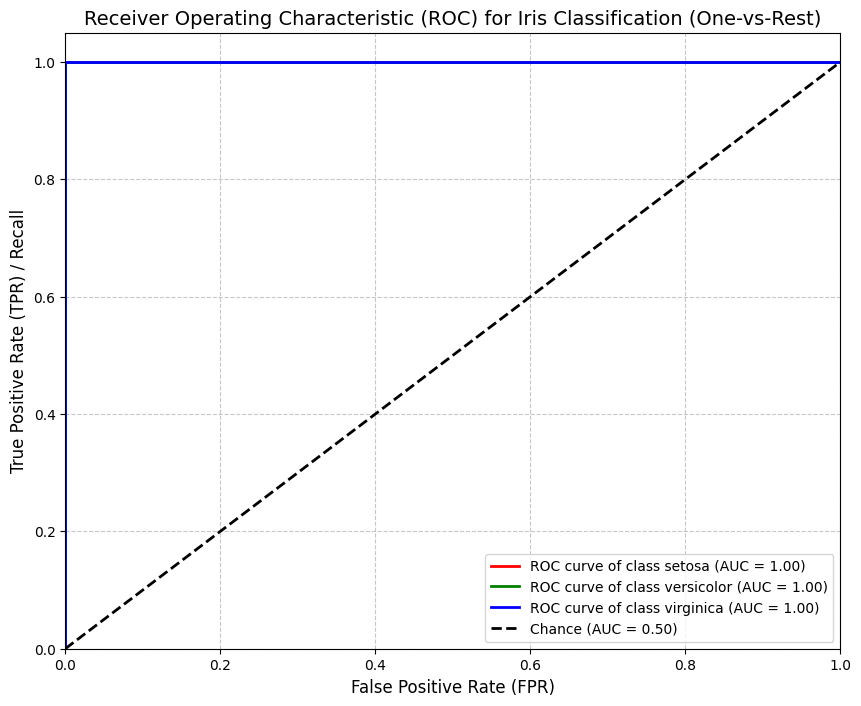


[AUC-ROC Plot Displayed]

Summary:
The model achieved high accuracy on the test set, reflecting the dataset's separability.
The AUC values close to 1.0 for all classes indicate the model has excellent discriminatory power.


In [39]:
# Store results
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    # Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    # Calculate Area Under the Curve (AUC)
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 6. Plotting the ROC Curves ---

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']

# Plot ROC curves for all three classes
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label=f'ROC curve of class {target_names[i]} (AUC = {roc_auc[i]:0.2f})'
    )

# Plot the chance line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance (AUC = 0.50)')

# Styling the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR) / Recall', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) for Iris Classification (One-vs-Rest)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n[AUC-ROC Plot Displayed]")

# --- Summary ---
print("\nSummary:")
print("The model achieved high accuracy on the test set, reflecting the dataset's separability.")
print("The AUC values close to 1.0 for all classes indicate the model has excellent discriminatory power.")
